https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [9]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


In [6]:
data = [
    14.09468782, 26.33661625, 36.65810885, 25.42381265,
    6.293304975, 6.471740806, 9.61336952, 9.866990236,
    13.1809536, 16.28643353, 20.73616446, 24.65747057,
    26.84370044, 27.20960205, 28.68365901, 31.1725184,
    32.68519881, 35.0641055, 39.55251323, 45.42785469,
    57.63325574, 66.37166482, 77.41442553, 99.1303041,
    106.0146596, 147.2011732, 172.5950492, 195.5906611,
    213.7088117, 233.4514696, 239.2583284, 257.0960012,
    281.353606, 310.1064784, 334.3652705, 346.6157385,
    366.1375691, 408.8023789
]

# Tạo mảng numpy.array từ dữ liệu GDP
gdp_array = np.array(data)

# In ra mảng để kiểm tra
print(gdp_array)

[ 14.09468782  26.33661625  36.65810885  25.42381265   6.29330497
   6.47174081   9.61336952   9.86699024  13.1809536   16.28643353
  20.73616446  24.65747057  26.84370044  27.20960205  28.68365901
  31.1725184   32.68519881  35.0641055   39.55251323  45.42785469
  57.63325574  66.37166482  77.41442553  99.1303041  106.0146596
 147.2011732  172.5950492  195.5906611  213.7088117  233.4514696
 239.2583284  257.0960012  281.353606   310.1064784  334.3652705
 346.6157385  366.1375691  408.8023789 ]


In [10]:
lag = 1  # Độ trễ 1

X = []
y = []

# Tạo dữ liệu đầu vào (X) và dữ liệu mục tiêu (y)
for i in range(len(gdp_array) - lag):
    X.append(gdp_array[i:i + lag])
    y.append(gdp_array[i + lag])

# Chuyển đổi X và y thành mảng numpy.array
X = np.array(X)
y = np.array(y)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tạo mô hình SVR
svr_model = SVR(C=1.0, epsilon=0.1, kernel='rbf')

# Huấn luyện mô hình
svr_model.fit(X_train, y_train)

# Dự báo trên tập kiểm tra
y_pred = svr_model.predict(X_test)



Mean Squared Error: 20284.54639210191


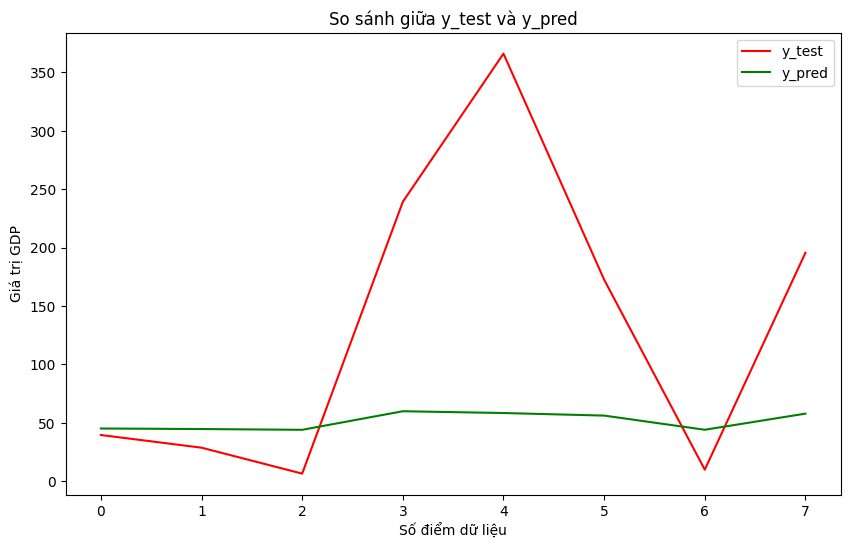

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ giá trị thực (y_test)
plt.plot(y_test, label='y_test', color='red')

# Vẽ giá trị dự đoán (y_pred)
plt.plot(y_pred, label='y_pred', color='green' )

# Thêm tiêu đề và nhãn trục
plt.title('So sánh giữa y_test và y_pred')
plt.xlabel('Số điểm dữ liệu')
plt.ylabel('Giá trị GDP')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Tính SSE (Sum of Squared Errors)
sse = np.sum((y_test - y_pred) ** 2)
print("Sum of Squared Errors (SSE):", sse)

# Tính R-squared (Hệ số xác định)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 20284.54639210191
Sum of Squared Errors (SSE): 162276.3711368153
R-squared: -0.3311104914102412


In [27]:


# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)



Root Mean Squared Error (RMSE): 142.42382663059544
Mean Absolute Error (MAE): 104.31460994031906
Mean Absolute Percentage Error (MAPE): 161.60352487893667
